# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

# Data Description

In [2]:
data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

In [6]:
# categorical variables
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'O':
        cat_cols.append(col)

In [7]:
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [8]:
# education.num column should also be categorical so we will add it
cat_cols.append('education.num')

In [9]:
data[cat_cols]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,education.num
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K,9
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K,9
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K,10
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K,4
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K,10
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K,10
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,12
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,9
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,9


In [10]:
# We have imbalanced dataset
for col in cat_cols:
    print(data[col].value_counts())
    print()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial   

In [11]:
# numerical columns
num_cols = set(data.columns).difference(cat_cols)

In [12]:
num_cols = list(num_cols)
num_cols

['capital.loss', 'hours.per.week', 'age', 'fnlwgt', 'capital.gain']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x3000 with 0 Axes>

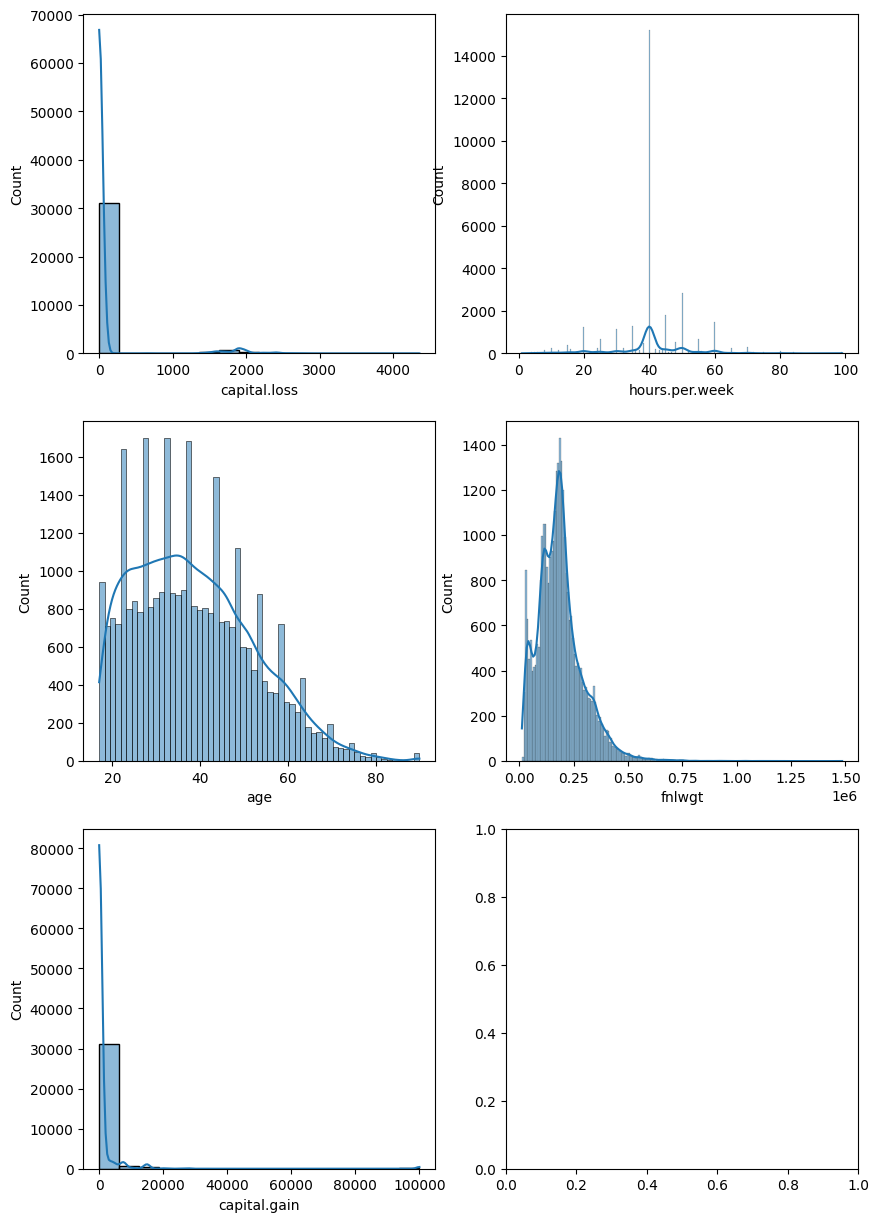

In [13]:
plt.figure(figsize = (10, 30))

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))

axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(data[col], kde = True, ax = axes[i])
    
plt.show()

# Data Cleaning

In [14]:
# only workclass, occupation and native.country has unknown values
# imputing with mode values
# In future, we will try to set unknown values of occupation as 'Others'
for col in ['workclass', 'occupation', 'native.country']:
    data[col].replace('?', data[col].mode()[0], inplace = True)

/tmp/ipykernel_18/1161497436.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace('?', data[col].mode()[0], inplace = True)


In [15]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
# We can see education is already label encoded in education.num, so we will drop education
data[['education.num', 'education']]

,education.num,education
0,9,HS-grad
1,9,HS-grad
2,10,Some-college
3,4,7th-8th
4,10,Some-college
...,...,...
32556,10,Some-college
32557,12,Assoc-acdm
32558,9,HS-grad
32559,9,HS-grad


In [17]:
data.drop(['education'], axis = 1, inplace = True)

# Data Pre-processing

In [18]:
X = data.drop(['income'], axis = 1)
y = data['income']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.3)

In [20]:
cat_cols.remove('education')
cat_cols.remove('income')

In [21]:
label_encoder = LabelEncoder()
for col in cat_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.18636555, -0.08486667, -0.24807436, ..., -0.21534294,
        -0.03560969,  0.26141864],
       [-1.21421076, -0.08486667, -1.18389285, ..., -0.21534294,
        -0.03560969,  0.26141864],
       [-0.11294804, -0.08486667,  0.52908627, ..., -0.21534294,
        -0.03560969,  0.26141864],
       ...,
       [ 0.54780959, -0.08486667, -0.15386477, ..., -0.21534294,
        -0.03560969,  0.26141864],
       [ 0.03388699, -0.08486667, -1.26117025, ..., -0.21534294,
        -0.03560969,  0.26141864],
       [ 1.35540225, -0.08486667,  0.21678122, ..., -0.21534294,
         0.37076728,  0.26141864]])

# Without PCA

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8205548162555021

<Axes: >

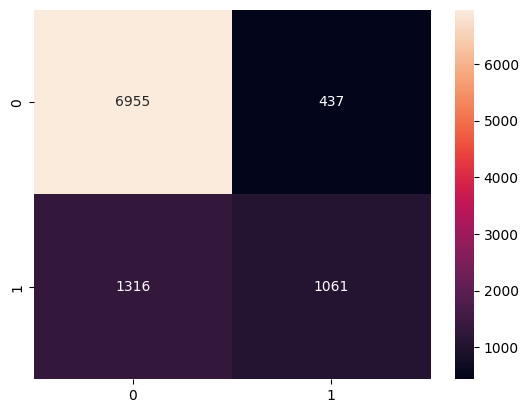

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '')

# With PCA

In [27]:
# finding the ideal number of components
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 11


In [28]:
pca = PCA(n_components = 11)
pca.fit(X_train)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

In [29]:
classifier = LogisticRegression()
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)

In [30]:
accuracy_score(y_test, y_pred)

0.8213737332377931